## Introduction
Welcome! In today's lesson, we are diving into the concept of Mutual Information for Feature Selection within the context of dimensionality reduction. By the end of this lesson, you'll understand how to use Mutual Information to measure the significance of features in a data set, thus leading to more efficient model computation by selecting the most relevant features.

We'll start with a brief introduction to Mutual Information, introduce you to the Wine dataset, demonstrate feature selection using Mutual Information, and finally visualize feature importance using a bar plot. So, let's dive in!

## Understanding Mutual Information
Mutual Information (MI) is a metric that quantifies the "mutual dependence" between two variables. In simpler terms, it measures how much knowing the value of one variable reduces the uncertainty about the value of the other variable. Hence, Mutual Information measures the 'information' that X and Y share.

In the context of machine learning and data science, MI can be used to provide a measure of how much 'information' about the target variable (outcome) is contained within the features. By identifying features that share more 'information' with the target, we can select the most relevant features for our model, leading to improved computational efficiency in training the model. This approach works best when we are dealing with categorical features or mixed data types.

Let's now understand how this is implemented using a real-world dataset.

## Understanding how Feature Selection using Mutual Information Works
Before moving on to the implementation, let's understand the algorithm of feature selection using Mutual Information:

Compute Mutual Information: Calculate the Mutual Information between each feature and the target variable. This step helps identify which features are most informative about the target variable. The higher the Mutual Information value, the more 'information' the feature carries about the target.
Select Features: Based on the Mutual Information values, select the features that are most informative about the target variable. These features will be used for model training and prediction.
Here is the formula for Mutual Information between two variables X and Y:
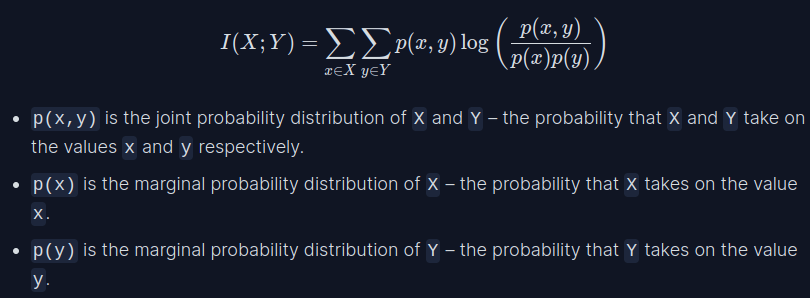

Now that we have a basic understanding of Mutual Information, let's move on to the implementation using the Wine dataset.

## Familiarizing with the Wine Dataset
For our feature selection demonstration, we'll use the Wine dataset available in sklearn. The Wine dataset is a well-known dataset in machine learning, which contains various chemical properties of wines grown in a specific region in Italy.

Let's load this dataset into our Python environment:



In [2]:
# Data Preparation
from sklearn import datasets

wine = datasets.load_wine()
X = wine['data']
y = wine['target']
features = wine['feature_names']
print(features)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Here, X contains our data (features), Y is the data we aim to predict (target), and features is a list containing the names of the features present in the dataset.

The output of the above code will be:

```json
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
```

This output confirms the wine dataset features, indicating what aspects of the wine are analyzed to classify its type.

Now let's use Mutual Information to find out which features carry the most 'information' about the target variable.

## Python Implementation of Mutual Information for Feature Selection
For our task, we need to import a few libraries such as pandas for manipulating our data, sklearn for computing Mutual Information, and matplotlib for visualizing our data.

To compute the Mutual Information between each feature and the target variable, we can use the function mutual_info_classif from sklearn. This function returns an array of mutual information values corresponding to each feature. Here's how we do it:

In [3]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

MI = mutual_info_classif(X, y, random_state=42)
MI_df = pd.Series(MI, index=features)

By converting the output into a pandas Series, we associate each MI value with its corresponding feature for easy reference.

The output of the above code will visualize the importance of each feature in a bar chart, allowing us to easily identify which features are most informative about the outcome. This visual representation aids in understanding the mutual information's insights, guiding the selection of attributes for modeling.



## Visualizing the Importance of Each Feature
After calculating the Mutual Information of each feature, it would be beneficial to visualize this using a bar chart. With such a chart, we can easily see which features are highly informative about the outcome, thereby fostering reasoning on the choice of attributes to be used in the model.



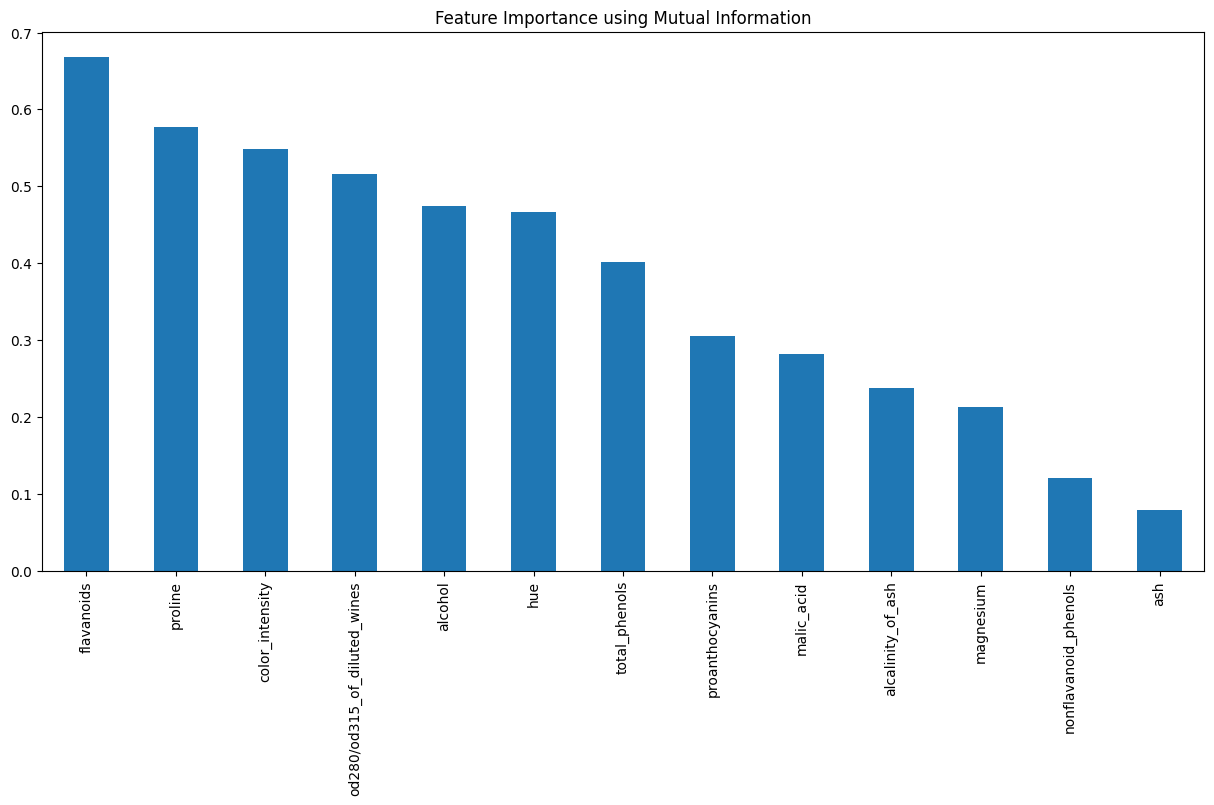

In [4]:
MI_df.sort_values(ascending=False).plot.bar(figsize=(15, 7))
plt.title("Feature Importance using Mutual Information")
plt.show()

This graphical display helps pinpoint which attributes of the wine are most predictive of its class, essentially guiding the feature selection process for model building:

## Using Custom Thresholds for Feature Selection
In some cases, you may want to set a threshold for selecting features based on their Mutual Information values. For instance, you might decide to select only those features with MI values above a certain threshold. Here's how you can implement this:

In [5]:
threshold = 0.5
selected_features = MI_df[MI_df > threshold].index
print("Selected Features: ", selected_features) # ['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']

Selected Features:  Index(['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines',
       'proline'],
      dtype='object')


## Lesson Summary and Practice
Congratulations! You've successfully learned how to use Mutual Information to select the most relevant features to model your data.

To recap, we covered the use of Mutual Information for feature selection with real-world data from the Wine dataset, including a detailed look at which features carry the most 'information' about the target variable, and we visualized this process.

In the upcoming practice exercises, you will implement Mutual Information feature selection on different datasets. This practice will solidify your grasp of the concept and help you become skilled at dimensionality reduction, making you well-equipped to handle high-dimensional data in future machine learning tasks. Keep up the good work!



## Visualizing Wine Data with Mutual Information

Are you curious about which chemical properties most significantly differentiate wine varieties? Run the code to uncover these key attributes through a Mutual Information analysis! You'll see a bar chart that highlights feature importance based on their Mutual Information scores with the target variable.

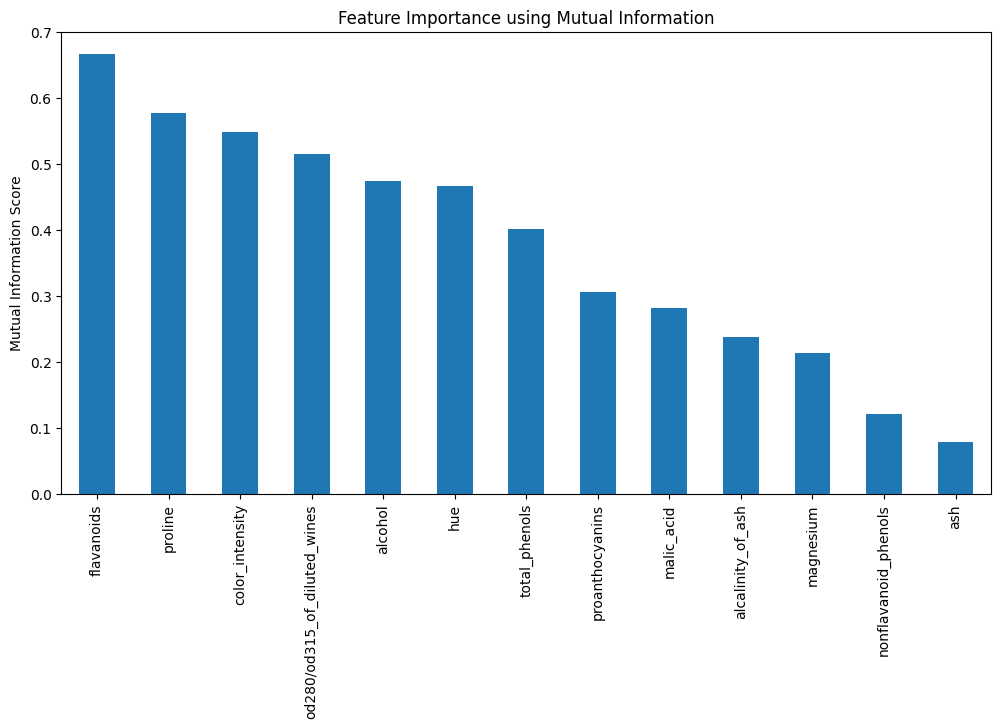

In [6]:
# Importing necessary libraries
from sklearn import datasets
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = datasets.load_wine()
X = wine['data']
y = wine['target']
features = wine['feature_names']

# Compute Mutual Information between each feature and the target variable
MI_scores = mutual_info_classif(X, y, random_state=42)
MI_df = pd.Series(MI_scores, index=features)

# Visualize the importance of each feature using a bar plot
# The figsize parameter determines the width and height of the plot in inches
MI_df.sort_values(ascending=False).plot.bar(figsize=(12, 6))
plt.title("Feature Importance using Mutual Information")
plt.ylabel('Mutual Information Score')
plt.show()

## Refining Feature Selection with SelectPercentile

For this mission, let's select features with high information. Modify the code to select features with Mutual Information scores above a threshold. Use a threshold of 0.5 for selection.

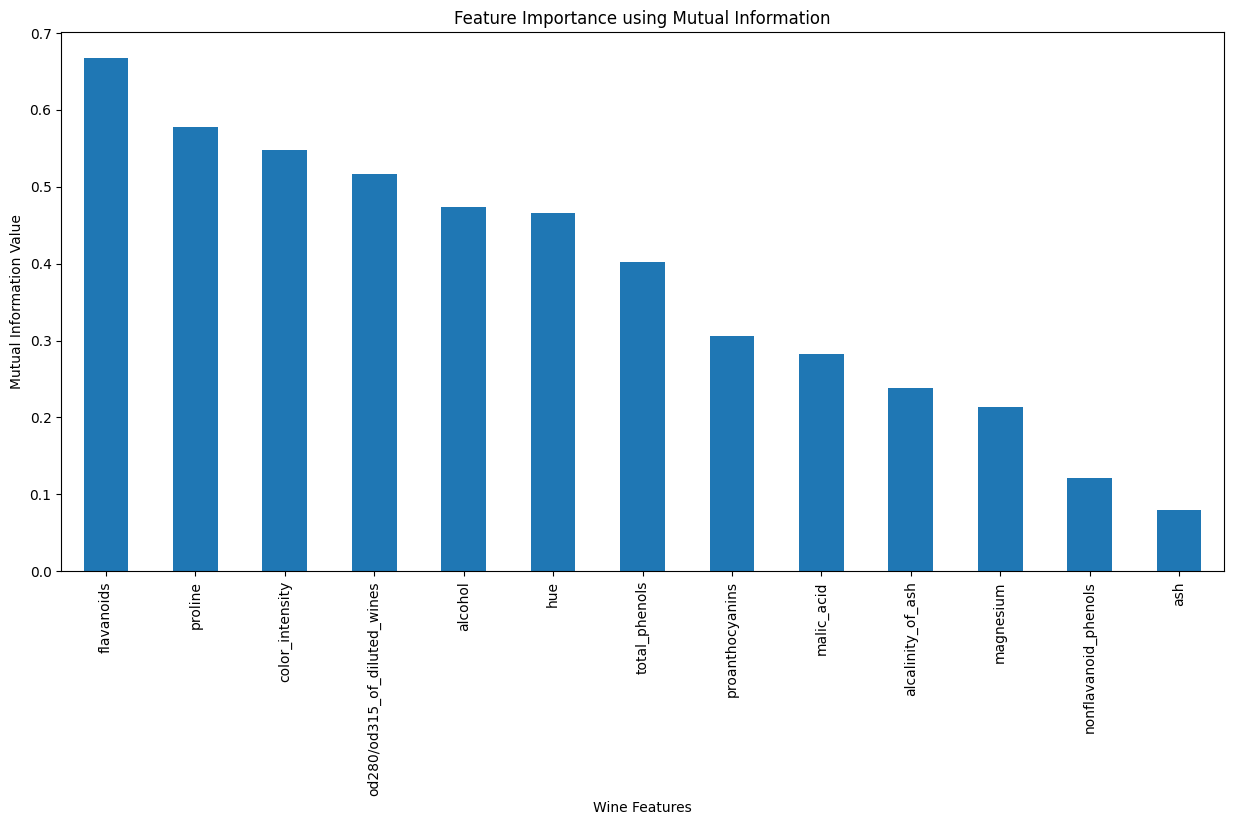

Selected features: ['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [7]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine['data']
y = wine['target']
features = wine['feature_names']

# Compute Mutual Information between features and target
MI = mutual_info_classif(X, y, random_state=42)
MI_df = pd.Series(MI, index=features)

# TODO: Update the code to select features with mutual information greater than 0.5
selected_features_names = MI_df[MI_df > 0.4].index.tolist()
# selected_features_names = MI_df[MI_df > 0.5].index.tolist()


# Visualize the importance of each feature using a bar chart
MI_df.sort_values(ascending=False).plot.bar(figsize=(15, 7))
plt.title("Feature Importance using Mutual Information")
plt.ylabel('Mutual Information Value')
plt.xlabel('Wine Features')
plt.show()

print("Selected features:", selected_features_names)

## Computing Mutual Relationships in Features

Excellent work, Space Voyager! Now it's time to apply your newfound knowledge. Your upcoming mission is to calculate something of significant importance: the relationship between features and their mutual interaction with the target. Are you ready? Set your course and embark on your journey!

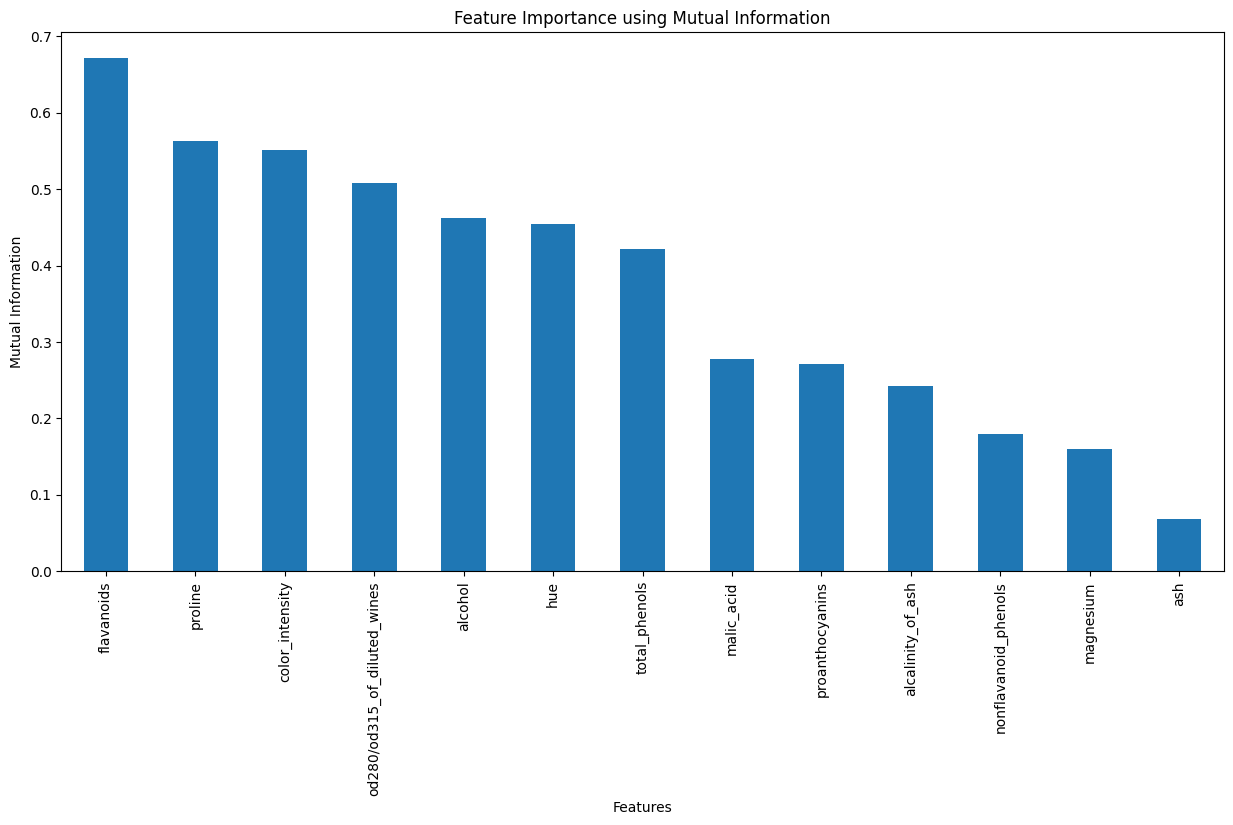

In [8]:
from sklearn import datasets
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Load Wine dataset
wine = datasets.load_wine()
X = wine['data']
y = wine['target']
features = wine['feature_names']

# Compute the mutual information metric between each feature and the target variable
MI = mutual_info_classif(X, y)
MI_df = pd.Series(MI, index=features)

# Visualize the importance using a bar chart
MI_df.sort_values(ascending=False).plot.bar(figsize=(15, 7))
plt.title("Feature Importance using Mutual Information")
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


## Wine Dataset Feature Selection with Mutual Information

Now that you've learned how to use Mutual Information for feature selection, let's wrap everything up! You're tasked with writing code to select and visualize the most informative features from the Wine dataset. Be the navigator of your data spaceship and reveal the features that are worth further analysis!

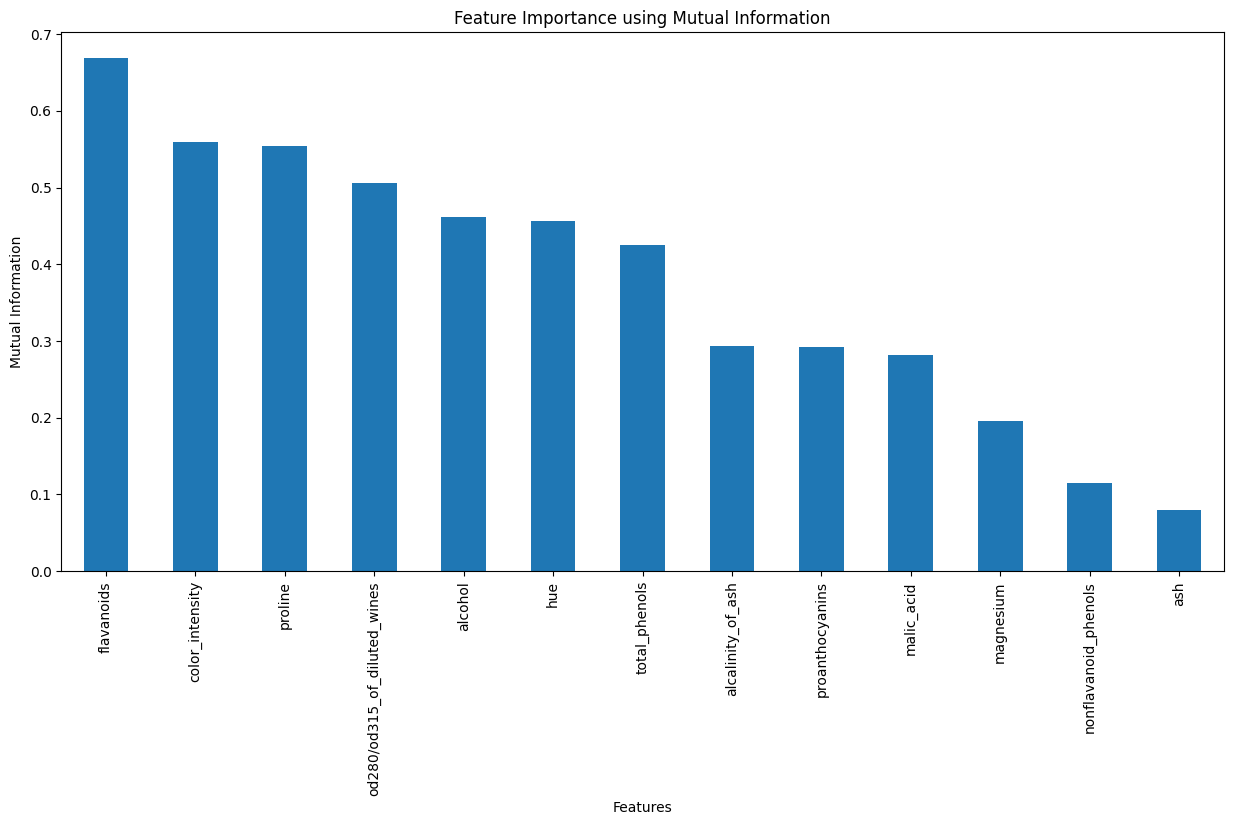

In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the features and target variable from the Wine dataset
wine = datasets.load_wine()
X = wine['data']
y = wine['target']
features = wine['feature_names']

# Compute the Mutual Information between features and the target
MI = mutual_info_classif(X, y)

# Convert the MI scores into a pandas Series
MI_df = pd.Series(MI, index=features)

# Visualize the MI scores using a bar plot
MI_df.sort_values(ascending=False).plot.bar(figsize=(15, 7))
plt.title("Feature Importance using Mutual Information")
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()
